In [23]:
import pandas as pd

In [24]:
df_train = pd.read_csv("../data/chestxpert/train.csv")

In [25]:
print(f"number of patients {df_train.shape[0]:,}")
print(f"healthy {df_train['No Finding'].sum():,}")

number of patients 223,414
healthy 22,381.0


In [26]:
df_train.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# drop all rows with -1 in any column
mask = (df_train[df_train == -1].sum(axis=1)==0)
df_certain = df_train[mask]

print(f"Removed uncertain cases: {df_certain.shape[0]:,}",)

Removed uncertain cases: 138,358


In [28]:
# only frontal x-rays
df_frontal = df_certain[df_certain["Frontal/Lateral"] == "Frontal"]

print(f"Only frontal x-rays: {df_frontal.shape[0]:,}",)

Only frontal x-rays: 118,286


In [35]:
# only one problem detected
mask = df_frontal[df_frontal.columns[5:-1]].sum(axis=1)==1
df_one_target = df_frontal[mask]

print(f"Number of patients with only one problem: {df_one_target.shape[0]:,}",)

Number of patients with only one problem: 44,757


In [36]:
df_one_target[df_one_target.columns[5:-1]].sum(axis=0)

No Finding                    16895.0
Enlarged Cardiomediastinum     1203.0
Cardiomegaly                   2014.0
Lung Opacity                   4193.0
Lung Lesion                     777.0
Edema                          4949.0
Consolidation                  1107.0
Pneumonia                       361.0
Atelectasis                    2686.0
Pneumothorax                   4033.0
Pleural Effusion               4770.0
Pleural Other                   256.0
Fracture                       1513.0
dtype: float64

In [40]:
df_one_target[df_one_target.columns[5:-1]].sum(axis=0)*100/df_one_target.shape[0]

No Finding                    37.748285
Enlarged Cardiomediastinum     2.687848
Cardiomegaly                   4.499855
Lung Opacity                   9.368367
Lung Lesion                    1.736041
Edema                         11.057488
Consolidation                  2.473356
Pneumonia                      0.806578
Atelectasis                    6.001296
Pneumothorax                   9.010881
Pleural Effusion              10.657551
Pleural Other                  0.571978
Fracture                       3.380477
dtype: float64

In [50]:
#remove patients with "No Finding" as only finding
df_nofindings = df_one_target[df_one_target["No Finding"] != 1]

In [65]:
df_nofindings.shape

(27862, 20)

In [52]:
# create target
df_nofindings["target"] = df_nofindings[df_nofindings.columns[5:-1]].apply(lambda x: x[x==1].index.tolist()[0], axis=1)

/var/folders/lh/myds7z711nngnwhfjtgt0bxh0000gn/T/ipykernel_2562/3778325823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nofindings["target"] = df_nofindings[df_nofindings.columns[5:-1]].apply(lambda x: x[x==1].index.tolist()[0], axis=1)


In [57]:
df_nofindings[["Path", "Sex", "Age", "AP/PA", "Support Devices", "target"]].fillna(0).head(5)

,Path,Sex,Age,AP/PA,Support Devices,target
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,AP,0.0,Edema
9,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,AP,0.0,Pneumothorax
10,CheXpert-v1.0-small/train/patient00005/study2/...,Male,33,AP,0.0,Pneumothorax
24,CheXpert-v1.0-small/train/patient00011/study7/...,Female,19,AP,1.0,Lung Opacity
30,CheXpert-v1.0-small/train/patient00011/study8/...,Female,19,AP,1.0,Lung Opacity


In [63]:
df_nofindings["Support Devices"].value_counts(normalize=True)*100

Support Devices
1.0    93.243059
0.0     6.756941
Name: proportion, dtype: float64

In [61]:
df_nofindings["Sex"].value_counts(normalize=True)*100

Sex
Male      59.493217
Female    40.506783
Name: proportion, dtype: float64

In [67]:
df_nofindings.target.nunique()

12

In [85]:
target_values = df_nofindings.target.value_counts().to_frame().reset_index()

In [75]:
import matplotlib.pyplot as plt

0 4949
1 4770
2 4193
3 4033
4 2686
5 2014
6 1513
7 1203
8 1107
9 777
10 361
11 256


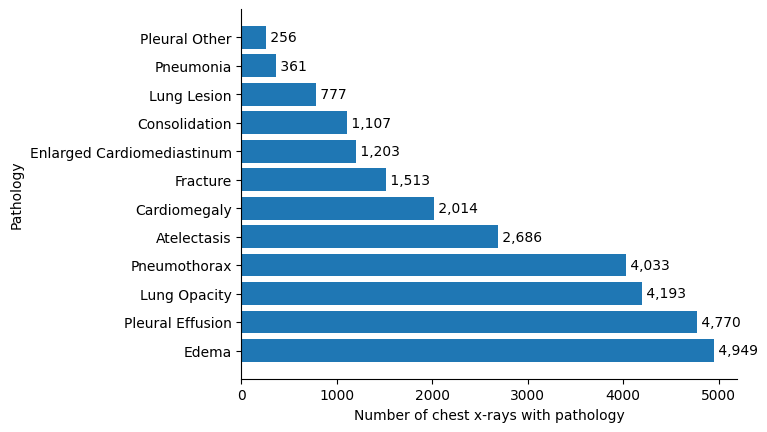

In [97]:
plt.barh(target_values["target"], target_values["count"])

# Adding title and labels
plt.xlabel('Number of chest x-rays with pathology')
plt.ylabel('Pathology')

for i, row in target_values.iterrows():
    value = row["count"]
    print(i, value)
    plt.text(value, i ,f' {value:,}', va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [121]:
df_test = pd.read_csv("../data/chestxpert/train_split_clean_onlydiagnosis.csv")

In [122]:
df_test[["target", "target_name"]].drop_duplicates()

,target,target_name
0,3,Edema
1,9,Pleural Effusion
2,12,Pneumothorax
4,7,Lung Opacity
5,1,Cardiomegaly
7,5,Fracture
9,0,Atelectasis
14,10,Pleural Other
23,2,Consolidation
26,6,Lung Lesion
